In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_data = np.load('C://Users//krist//Desktop//ITU//3_semester//machine_learning//MLProject2024//MLProject2024//fashion_train.npy')

In [42]:
image = [i for i in training_data[:][:-1]]
label = [i for i in training_data[:][-1]]

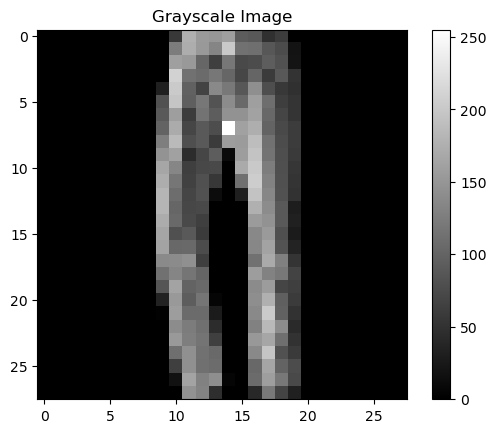

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape the data assuming it's a 28x28 image
image_data = training_data[1][:-1].reshape(28, 28)

# Plotting the grayscale image
plt.imshow(image_data, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.title("Grayscale Image")
plt.show()



In [44]:
for i in range(len(image)):
    for k in range(len(image[i])):
        if image[i][k] != 0:
            image[i][k] = image[i][k] / 255

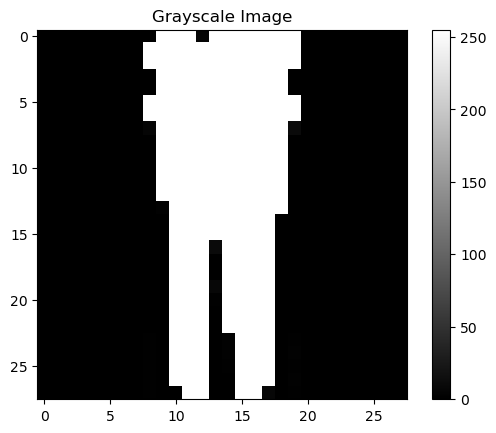

In [49]:
# Reshape the data assuming it's a 28x28 image
image_data = image[5][:-1].reshape(28, 28)

# Plotting the grayscale image
plt.imshow(image_data, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.title("Grayscale Image")
plt.show()
